<a href="https://colab.research.google.com/github/mbabaie/COT5600/blob/master/hw3/MaryamBabaie_COT5600_HW3_Spring2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Maryam Babaie, HW3 COT5600 Spring 2020

### Problem 1 

**Fourier matrix**

Let $\omega=\mathrm{exp}(2\pi i/N)$ be the $N$th root of unity.  The Fourier matrix of size $N$ is the matrix $F_N=(q_{k,\ell})\in\mathbb{C}^{N\times N}$ whose entries are given by
$$q_{k,\ell}=\frac{1}{\sqrt{N}} \omega^{k \cdot \ell}$$ for $k, \ell \in \{0,\ldots,N-1\}$.

Using numpy, implement the function ```get_fourier_matrix``` that creates the Fourier matrix of size $N$.

Compute the eigenvalues of eigenvectors of the Fourier matrix.  

To check that your code is correct, you should verify the following properties:

- the Fourier matrix is unitary 
- the fourth power of $F_N^4$ is equal to the identity matrix
- its eigenvalues are $1, i, -1, -i$ (the multiplicities of these eigenvalues are given on the wikipedia page [discrete fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) in section *eigenvalues and eigenvectors*)

--------------------------------------------------------------------------------------------------
### **Solution**

For this problem I'm going to use Vandermonde Approach.
First, based on the definition provided in the problem for $F_N$, we can depict the following format for $F_N$ where $\omega=\mathrm{exp}(2\pi i/N)$:


![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/cb5067424855d663a300c4df3ff9b44176601bca)

On the other hand, if we do a variable redefinition for powers of $\omega$ as :  $\omega^{k\times l}=\omega^i=\alpha_i$, then we're going to have the following matrix format:


![alt text](https://drive.google.com/uc?id=1VXl39XscVy2P6mO_fHW5fBeF6I4y8e0s)

Then, if we multiply the above matrix by square root of N, the remaining part is a specific representation of a matrix which is known as Vandermonde Matrix which is as following:


![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/237d31d32749796a8b4361d56a37f91fa34f7d68)


I will use the above mentioned relations to take advantage of the Vandermonde Matrix from NumPy to implement the solution to this problem.

My reference for this part: https://slideplayer.com/slide/14173715/






In [0]:
import numpy as np
from numpy import linalg as la

const = np.pi*1j*2

def get_fourier_matrix (N):
  w = np.exp(const/N)
  Fn = (1/np.sqrt(N)) * np.vander([w**a for a in range(N)], increasing=True)
  return[Fn]

def get_eig_val_vec(F):
  val, vec = la.eig(F)
  return [val, vec]

def is_unitary(M, n):
  M = np.squeeze(np.asarray(M))
  M = M.dot(M.conj().T)
  M = np.round(1e7 * M)/1e7;
  #if np.allclose(np.eye(n)+(0*1j), M):
  if np.allclose(np.eye(n), M):
    print("It's unitary!")
  else:
    print("It's NOT unitary!")

def is_4thpow_id(M, n):
  M = np.squeeze(np.asarray(M));
  M = np.round(1e7 * M)/1e7;
  #if np.allclose(np.eye(n)+(0*1j), la.matrix_power(M, 4)):
  if np.allclose(np.eye(n), la.matrix_power(M, 4)):
    print("4th power of F is identity!\n")
  else:
    print("4th power of F is NOT identity!\n")

def testFM(n):
  F = get_fourier_matrix(n)
  val, vec = get_eig_val_vec(F)
  print('N = {0}'.format(n))
  print('F = \n{0}'.format(F))
  print('\n')
  print('Eigenvalues = {0}'.format(val))
  print('\n')
  print('Eigenvectors = {0}'.format(vec))
  print('\n')
  is_unitary(F,n)
  is_4thpow_id(F,n)
  print('Eigenvalues are {}th root of unity?: {}'.format(n, np.allclose(val**n, 1)))
  print("------------------------------------------------------------------------------------\n")


### test
testFM(2)
testFM(4)




N = 2
F = 
[array([[ 0.70710678+0.00000000e+00j,  0.70710678+0.00000000e+00j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])]


Eigenvalues = [[ 1.+1.26816328e-17j -1.+7.39139728e-17j]]


Eigenvectors = [[[ 0.92387953+0.00000000e+00j -0.38268343-1.65693518e-17j]
  [ 0.38268343+1.65693518e-17j  0.92387953+0.00000000e+00j]]]


It's unitary!
4th power of F is identity!

Eigenvalues are 2th root of unity?: True
------------------------------------------------------------------------------------

N = 4
F = 
[array([[ 5.00000000e-01+0.0000000e+00j,  5.00000000e-01+0.0000000e+00j,
         5.00000000e-01+0.0000000e+00j,  5.00000000e-01+0.0000000e+00j],
       [ 5.00000000e-01+0.0000000e+00j,  3.06161700e-17+5.0000000e-01j,
        -5.00000000e-01+6.1232340e-17j, -9.18485099e-17-5.0000000e-01j],
       [ 5.00000000e-01+0.0000000e+00j, -5.00000000e-01+6.1232340e-17j,
         5.00000000e-01-1.2246468e-16j, -5.00000000e-01+1.8369702e-16j],
       [ 5.00000000e-01+0.0000000e

**Cyclic shift matrix**

The cyclic shift matrix is the matrix $P_N=(p_{k,\ell}\in\mathbb{C}^{N\times N}$ whose entries are given by

$$ p_{k,\ell} = 1 \mbox{ if } \ell = k + 1 \pmod{N} $$

$$ p_{k,\ell} = 0 \mbox{ if } \ell \neq k + 1 \pmod{N} $$

Using numpy, implement the function ```get_cyclic_shift_matrix``` that create the cyclic shift matrix of size $N$.

Compute the eigenvalues of $P_N$.

To show that your code is correct, you should verify the following properties:

- the cyclic shift matrix is unitary
- the $N$th power of the cyclic shift matrix is the identity matrix
- the eigenvalues of the cyclic shift matrix are $N$th roots of unity
- the cyclic shift matrix is diagonalized by the Fourier matrix, that is, $F_N^\dagger P_N F_N$ is diagonal.

--------------------------------------------------------------------------------------------------
### **Solution**

I will directly use the formula given in the problem to make the cyclic shift matrix (CSM) by creating each element of the matrix. Then, I eill test it by checking the rules set in te problem, one by one.

In [0]:
def get_cyclic_shift_matrix(n):
  return np.asarray([[((0,1)[l == (k+1) % n]) for l in range(n)] for k in range(n)])

def is_Nthpow_id(M, n):
  M = np.squeeze(np.asarray(M));
  M = np.round(1e7 * M)/1e7;
  print("{}th Power = \n{}".format(n,la.matrix_power(M, n)))
  if np.allclose(np.eye(n)+(0*1j), la.matrix_power(M, n)):
    print("Nth power of CSM is identity!\n")
  else:
    print("Nth power of CSM is NOT identity!\n")

def is_NthRootOfUnity(M,n):
  #np.allclose(np.eye(n)+(0*1j), la.matrix_power(M, n))
  if np.allclose(M**n, 1):
    print("The eigenvalues of the CSR are Nth roots of unity!\n")
  else:
    print("The eigenvalues of the CSR are NOT Nth roots of unity!\n")

def isDiagonal(M,n) : 
    for i in range(0, n): 
        for j in range(0, n) : 
            if ((i != j) and
             (M[i][j] != 0)) : 
                return False
  
    return True

def is_diag(M, n):
  F = get_fourier_matrix(n)
  F = np.squeeze(np.asarray(F))
  F = np.round(1e7 * F)/1e7;
  Fdag = F.conj().T
  res = Fdag.dot(M).dot(F)
  print("RES of F_dag.P.F=\n")
  print(res)
  if isDiagonal(res,n):
    print("CSM is diagonalized by the Fourier matrix!\n")
  else:
    print("CSM is NOT diagonalized by the Fourier matrix!\n")

def testCSM(n):
  CSM = get_cyclic_shift_matrix(n)
  val, vec = get_eig_val_vec(CSM)
  print('N = {0}'.format(n))
  print('CSM = \n{0}'.format(CSM))
  print('\n')
  print('Eigenvalues = {0}'.format(val))
  print('\n')
  print('Eigenvectors = {0}'.format(vec))
  print('\n')
  is_unitary(CSM,n)
  is_Nthpow_id(CSM,n)
  is_NthRootOfUnity(val,n)
  is_diag(CSM,n)
  print("------------------------------------------------------------------------------------\n")




#test
testCSM(4)



N = 4
CSM = 
[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]


Eigenvalues = [-1.00000000e+00+0.j  8.32667268e-17+1.j  8.32667268e-17-1.j
  1.00000000e+00+0.j]


Eigenvectors = [[-5.00000000e-01+0.00000000e+00j  1.38777878e-16-5.00000000e-01j
   1.38777878e-16+5.00000000e-01j -5.00000000e-01+0.00000000e+00j]
 [ 5.00000000e-01+0.00000000e+00j  5.00000000e-01+1.52655666e-16j
   5.00000000e-01-1.52655666e-16j -5.00000000e-01+0.00000000e+00j]
 [-5.00000000e-01+0.00000000e+00j -3.74700271e-16+5.00000000e-01j
  -3.74700271e-16-5.00000000e-01j -5.00000000e-01+0.00000000e+00j]
 [ 5.00000000e-01+0.00000000e+00j -5.00000000e-01+0.00000000e+00j
  -5.00000000e-01-0.00000000e+00j -5.00000000e-01+0.00000000e+00j]]


It's unitary!
4th Power = 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Nth power of CSM is identity!

The eigenvalues of the CSR are Nth roots of unity!

RES of F_dag.P.F=

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0

As can be seen, the result of $F_N^\dagger P_N F_N$ which is printed above is diagonal and all the conditions are satisfied.

--------------------------------------------------------------------------------------------------------------------

### Problem 2

Using Qiskit IBM Q Experience, implement the quantum phase estimation circuit with 3-bit precision.  

This quantum circuit is explained on pages 110-113 (Inverse Fourier transform for 3 qubits) of the lecture slides.

Write a function that create the state

$$ 
\frac{1}{\sqrt{2}} ( |0\rangle + e^{2\pi i 2^2 \varphi} |1\rangle ) \otimes 
\frac{1}{\sqrt{2}} ( |0\rangle + e^{2\pi i 2^1 \varphi} |1\rangle ) \otimes 
\frac{1}{\sqrt{2}} ( |0\rangle + e^{2\pi i 2^0 \varphi} |1\rangle ) 
$$

for arbitrary $\varphi\in [0,1)$. 

(This is the state that we would obtain by 
- preparing the three control bits in the $|+\rangle$ state 
- applying the control power of $U^{2^2}, U^{2^1}, U^{2^0}$ gates

assuming that the target qubit is in state $|\psi\rangle$ and $U|\psi\rangle=e^{2 \pi i \varphi} |\psi\rangle$.)

You can preprare the initial state applying ```U1``` gates on qubits prepared $|+\rangle$. See [Qiskit U1 gate documentation](https://qiskit.org/documentation/stubs/qiskit.extensions.U1Gate.html). 

The controlled $R_k^\dagger$ gates occuring in the inverse Fourier transform circuit can be realized with the help of controlled ```U1``` gates.  

### Solution


------------------------------------------------------------------------------------
The Quantum Phase Estimation algorithm (aka quantum eigenvalue estimation algorithm), is a quantum algorithm which estimates the phase (or eigenvalue) of an eigenvector of a unitary operator. given a unitary matrix $U$ and a quantum state $|\psi\rangle$ such that $U|\psi\rangle=e^{2 \pi i \varphi} |\psi\rangle$ the algorithm estimates the value of $\varphi$ with high probability within additive error. 

The problem states U is an unitary operator that operates on m qbits with an eigenvector $|\psi\rangle$ such that $U|\psi\rangle=e^{2 \pi i \varphi} |\psi\rangle$ while 0 <=$\varphi$< 1. We would like to find the eigenvalue $e^{2 \pi i \varphi}$ of $|\psi\rangle$, which in this case is equivalent to estimating the phase $\varphi$ , to a finite level of precision. We can write the eigenvalue in the form $e^{2 \pi i \varphi}$ because U is a unitary operator over a complex vector space, so its eigenvalues must be complex numbers with absolute value 1.

The schematics of the algorithm is depicted as:


![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/PhaseCircuit-crop.svg/750px-PhaseCircuit-crop.svg.png))


Here is the interpretation of the above schematic: n qbits as |0> and m qbits eigenvector as $|\psi\rangle$, all are given. 

1. In the 1st step the QPE algorithm applies a hadamard gate on each of the given |0> qbits to perform the phase kickback. 

2. Then, it applies the powers of controlled U gate on the input  $|\psi\rangle$.

3. Then, at this stage, QPE applies invers quantum fourier transform on the n qbits (result of 1st step). The schematic for the invers QFT is depicted as follows:

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Q_fourier_nqubits.png/1050px-Q_fourier_nqubits.png)

In this schematic, H is the hadamard gate as we had in hw2, H and R are described by the matrices as follows:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/85ec1adaa920ff0b4493e1de6e1181c8c0486b65)


4. Finally, like many other quantum algorithm, in the final stage we do a measurement. In this algorithm we measure the n qbits result of inverse QFT. The final outcome would be the probability of each bit in the $n$-bit binary fractional sequence $0.b_1b_2 \ldots b_n$.

Another point I need to mention is how to specify the $|\psi\rangle$ and eigenvec and eigenval of U. Matrix U is defined as:

$U = \left(\begin{array}{cc} 1    ,  0; \\ 0,   e^{2 \pi i \varphi}; \end{array}\right)$

So, if I take $|\psi\rangle$=|1> and do U|1>, then:

$\left(\begin{array}{cc} 1    ,  0; \\ 0,   e^{2 \pi i \varphi}; \end{array}\right)$ $\left(\begin{array}{cc} 0 ; \\ 1; \end{array}\right)$ = $\left(\begin{array}{cc} 0 ; \\ e^{2 \pi i \varphi}; \end{array}\right)$
= $e^{2 \pi i \varphi}$ $\left(\begin{array}{cc} 0 ; \\ 1; \end{array}\right)$

On the other hand, we know:

U$|\psi\rangle$ = $\lambda$ $|\psi\rangle$

So, we can infer from the 2 equations above that $\lambda$ = $e^{2 \pi i \varphi}$. So the eigenval and eigenvec of U are $e^{2 \pi i \varphi}$ and $|\psi\rangle$ respectively.


------------------------------------------------------------------------------------
My sources for this question's solution:

Course Slides

https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html

https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm

https://en.wikipedia.org/wiki/Quantum_Fourier_transform

In [0]:
pip install qiskit-terra[visualization]

     |████████████████████████████████| 3.0MB 4.4MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 5.6MB 15.2MB/s 
     |████████████████████████████████| 788kB 32.9MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 921kB 29.4MB/s 
     |████████████████████████████████| 153kB 44.8MB/s 
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24080 sha256=b0b23fbe7f94fcf8b024d6395c6b8fe97bf99ebf17b5f079eed7dfdc2afb00c0
  Stored in directory: /root/.cache/pip/wheels/34/31/15/7b070b25d0a549d20ce2e9fe6d727471c2c61ef904720fd40c
  Created wheel for marshmallow-polyfield: filename=marshmallow_polyfield-5.9-cp36-none-any.whl size=8537 sha256=a50d07bff99fbf0f24b63ea18512306ed75f2b74269efd29ae5810b1efe58d68
  Stored in directory: /root/.cache/pip/wheels/69/27/3e/7472f75eab2db111aa387715fe009af15899459517fc1a1906
  Created wheel for pylatexenc: filename=pyla

In [0]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np
# importing Qiskit
import qiskit as qk
# import basic plot tools
from qiskit.visualization import plot_histogram

In [0]:
def QuantumPhaseEstimation(theta,qNum):
  theta = 2*np.pi*theta
  qr = qk.QuantumRegister(qNum, 'q')
  psi = qk.QuantumRegister(1, 'psi')
  cr = qk.ClassicalRegister(qNum, 'c')
  myCircuit = qk.QuantumCircuit(qr, psi, cr)
  # apply hadamard to the first three Qubits
  myCircuit.h(qr[0:qNum])
  # change the psi from |0> to |1>
  myCircuit.x(psi[0])
  # apply CU gates:
  for Q in range(qNum):
      for _ in range(2**(qNum-1-Q)):
        myCircuit.cu1(theta,qr[Q], psi[0])
  myCircuit.barrier()
  # apply Inverse QFT:
  for Q in range(qNum):
          for n in range(Q):
              myCircuit.cu1(-np.pi/float(2**(Q-n)), n, Q)
          myCircuit.h(Q)
  myCircuit.barrier()
  # Measuring
  for Q in range(qNum):
      myCircuit.measure(Q,Q)
  return myCircuit



===============================================================================

**Results** for Theta = 3/8 

       ┌───┐                                                         ░ ┌───┐»
  q_0: ┤ H ├─■───────■───────■───────■───────────────────────────────░─┤ H ├»
       ├───┤ │       │       │       │                               ░ └───┘»
  q_1: ┤ H ├─┼───────┼───────┼───────┼───────■───────■───────────────░──────»
       ├───┤ │       │       │       │       │       │               ░      »
  q_2: ┤ H ├─┼───────┼───────┼───────┼───────┼───────┼───────■───────░──────»
       ├───┤ │3pi/4  │3pi/4  │3pi/4  │3pi/4  │3pi/4  │3pi/4  │3pi/4  ░      »
psi_0: ┤ X ├─■───────■───────■───────■───────■───────■───────■───────░──────»
       └───┘                                                         ░      »
  c_0: ═════════════════════════════════════════════════════════════════════»
                                                                            »
  c_1: ═════════════════════════════════════════════════════════════════════»
                                                                

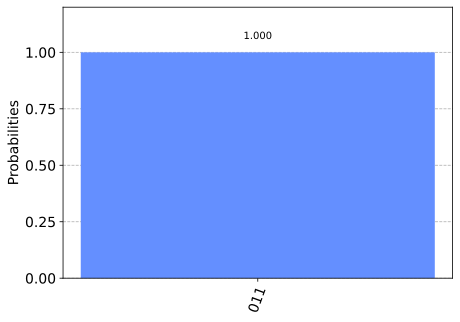

In [0]:
theta = 3/8
qNum = 3
myCircuit = QuantumPhaseEstimation(theta,qNum)
print(myCircuit)

backend = qk.BasicAer.get_backend('qasm_simulator')
shots = 2048
results = qk.execute(myCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

===============================================================================

**Results** for Theta = 5/8


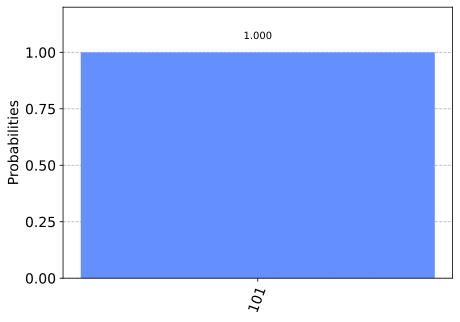

In [0]:
theta = 5/8
qNum = 3
myCircuit = QuantumPhaseEstimation(theta,qNum)

backend = qk.BasicAer.get_backend('qasm_simulator')
shots = 2048
results = qk.execute(myCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

===============================================================================

**Results** for Theta = 3/7 

3 Qubits are not enough to accurately estimate theta



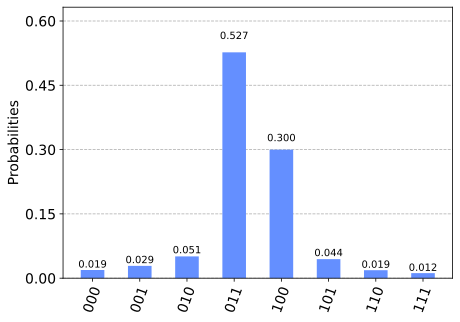

In [0]:
theta = 3/7
qNum = 3
myCircuit = QuantumPhaseEstimation(theta,qNum)
backend = qk.BasicAer.get_backend('qasm_simulator')
shots = 2048
results = qk.execute(myCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

Here we computed Theta would be between 3/8 and 4/8 which is correct.   

0.38 < Thete = 0.43 < 0.5

===============================================================================

**Results** for Theta = 3/7 with more Qubits

Lets increase the number of Qubits to have better estimation of Theta


       ┌───┐                                                                »
  q_0: ┤ H ├─■───────■───────■───────■───────■───────■───────■───────■──────»
       ├───┤ │       │       │       │       │       │       │       │      »
  q_1: ┤ H ├─┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼──────»
       ├───┤ │       │       │       │       │       │       │       │      »
  q_2: ┤ H ├─┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼──────»
       ├───┤ │       │       │       │       │       │       │       │      »
  q_3: ┤ H ├─┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼──────»
       ├───┤ │6pi/7  │6pi/7  │6pi/7  │6pi/7  │6pi/7  │6pi/7  │6pi/7  │6pi/7 »
psi_0: ┤ X ├─■───────■───────■───────■───────■───────■───────■───────■──────»
       └───┘                                                                »
  c_0: ═════════════════════════════════════════════════════════════════════»
                                                                

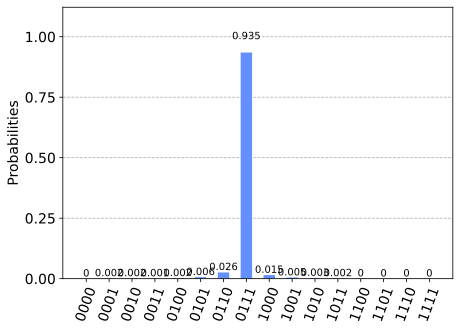

In [0]:
theta = 3/7
qNum = 4
myCircuit = QuantumPhaseEstimation(theta,qNum)
print(myCircuit)
backend = qk.BasicAer.get_backend('qasm_simulator')
shots = 2**13
results = qk.execute(myCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

With 4 Qubits we got Theta ~= 7/16 = 0.44 which is much more accurate than the previous estimation